In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc
from herbie import paint

import matplotlib.pyplot as plt
import matplotlib.font_manager as fmgr
from matplotlib import rcParams
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import os

rcParams["font.family"] = "Avenir Next"
rcParams["font.weight"] = "bold"

In [2]:
def get(i,d,h):
    H = Herbie(f"2025-04-{d} {i}:00", model="hrrr", fxx=h)
    ds = H.xarray(f":REFC:entire atmosphere")
    return ds, H

In [ ]:
def plot(ds, H, h):
    H = H
    ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[7, 7], dpi=800, add_coastlines=True, coastlines_kw={"color":"#1b2433"})
    ax = ax.LAND(facecolor="#aab9d1", edgecolor="k", linewidth=1)
    ax = ax.COUNTIES(edgecolor="k", linewidth=0.5)
    ax = ax.BORDERS(color="#aab9d1", linewidth=1)
    ax = ax.STATES(facecolor="#aab9d1", edgecolor="k", linewidth=1)
    ax = ax.LAKES(facecolor="#1b243300", linewidth=0.5)
    ax = ax.OCEAN(facecolor="#1b2433")
    ax = ax.ax

    colors = paint.RadarReflectivity.colors
    colors[0] = "#1b243300"
    norm, norm2 = paint.make_custom_cmaps("customreflec", colors, paint.RadarReflectivity.bounds)

    p = ax.pcolormesh(
        ds.longitude,
        ds.latitude,
        ds.refc,
        transform=pc,
        cmap = plt.get_cmap("customreflec"),
        norm = norm2,
    )
    fig = ax.get_figure()
    fig.suptitle(
        f"Monday Evening Storms",
        x=0.125,
        y=0.91,
        horizontalalignment="left",
        color="#e1e8f2",
        size=21
    ) 
    ax.set_title(f"Northeast Metro // HRRR // Init @ {ds.time.dt.strftime('%H:%MZ %d %b %Y').item()}\nHour [{h}] // Valid @ {ds.valid_time.dt.strftime('%H:%MZ %d %b %Y').item()}", 
                loc="left", 
                color="#aab9d1", 
                size=11)

    
    ax.set_xlim(1500000, 2500000)
    ax.set_ylim(200000, 950000)

    ax.set_xlim(1250000, 2250000)
    ax.set_ylim(1600000, 2100000)

    fig.set_facecolor("#1b2433")
    plt.box(on=None)

    fig.text(.12,.065, "Made by Avinash Aravind", color="#e1e8f2", fontsize=14)
    fig.text(.12,.04, "Data from NOAA via AWS/NOMADS | Plotted using Herbie", color="#e1e8f2", fontsize=11, alpha=0.6)

    return ax, p

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Apr-02 00:00 UTC F18 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/Users/avinasharavind/data/hrrr/20250402]
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Apr-02 00:00 UTC F19 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Apr-02 00:00 UTC F20 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Apr-02 00:00 UTC F21 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Apr-02 00:00 UTC F22 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Apr-02 00:00 UTC F23 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Apr-02 00:00 UTC F24 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/Users/avinasharavind/data/hrrr/20250402]
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Apr-02 00:00 UTC F25 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Apr-02 00:00 UTC F26 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Apr-02 00:00 UTC F27 ┊ 

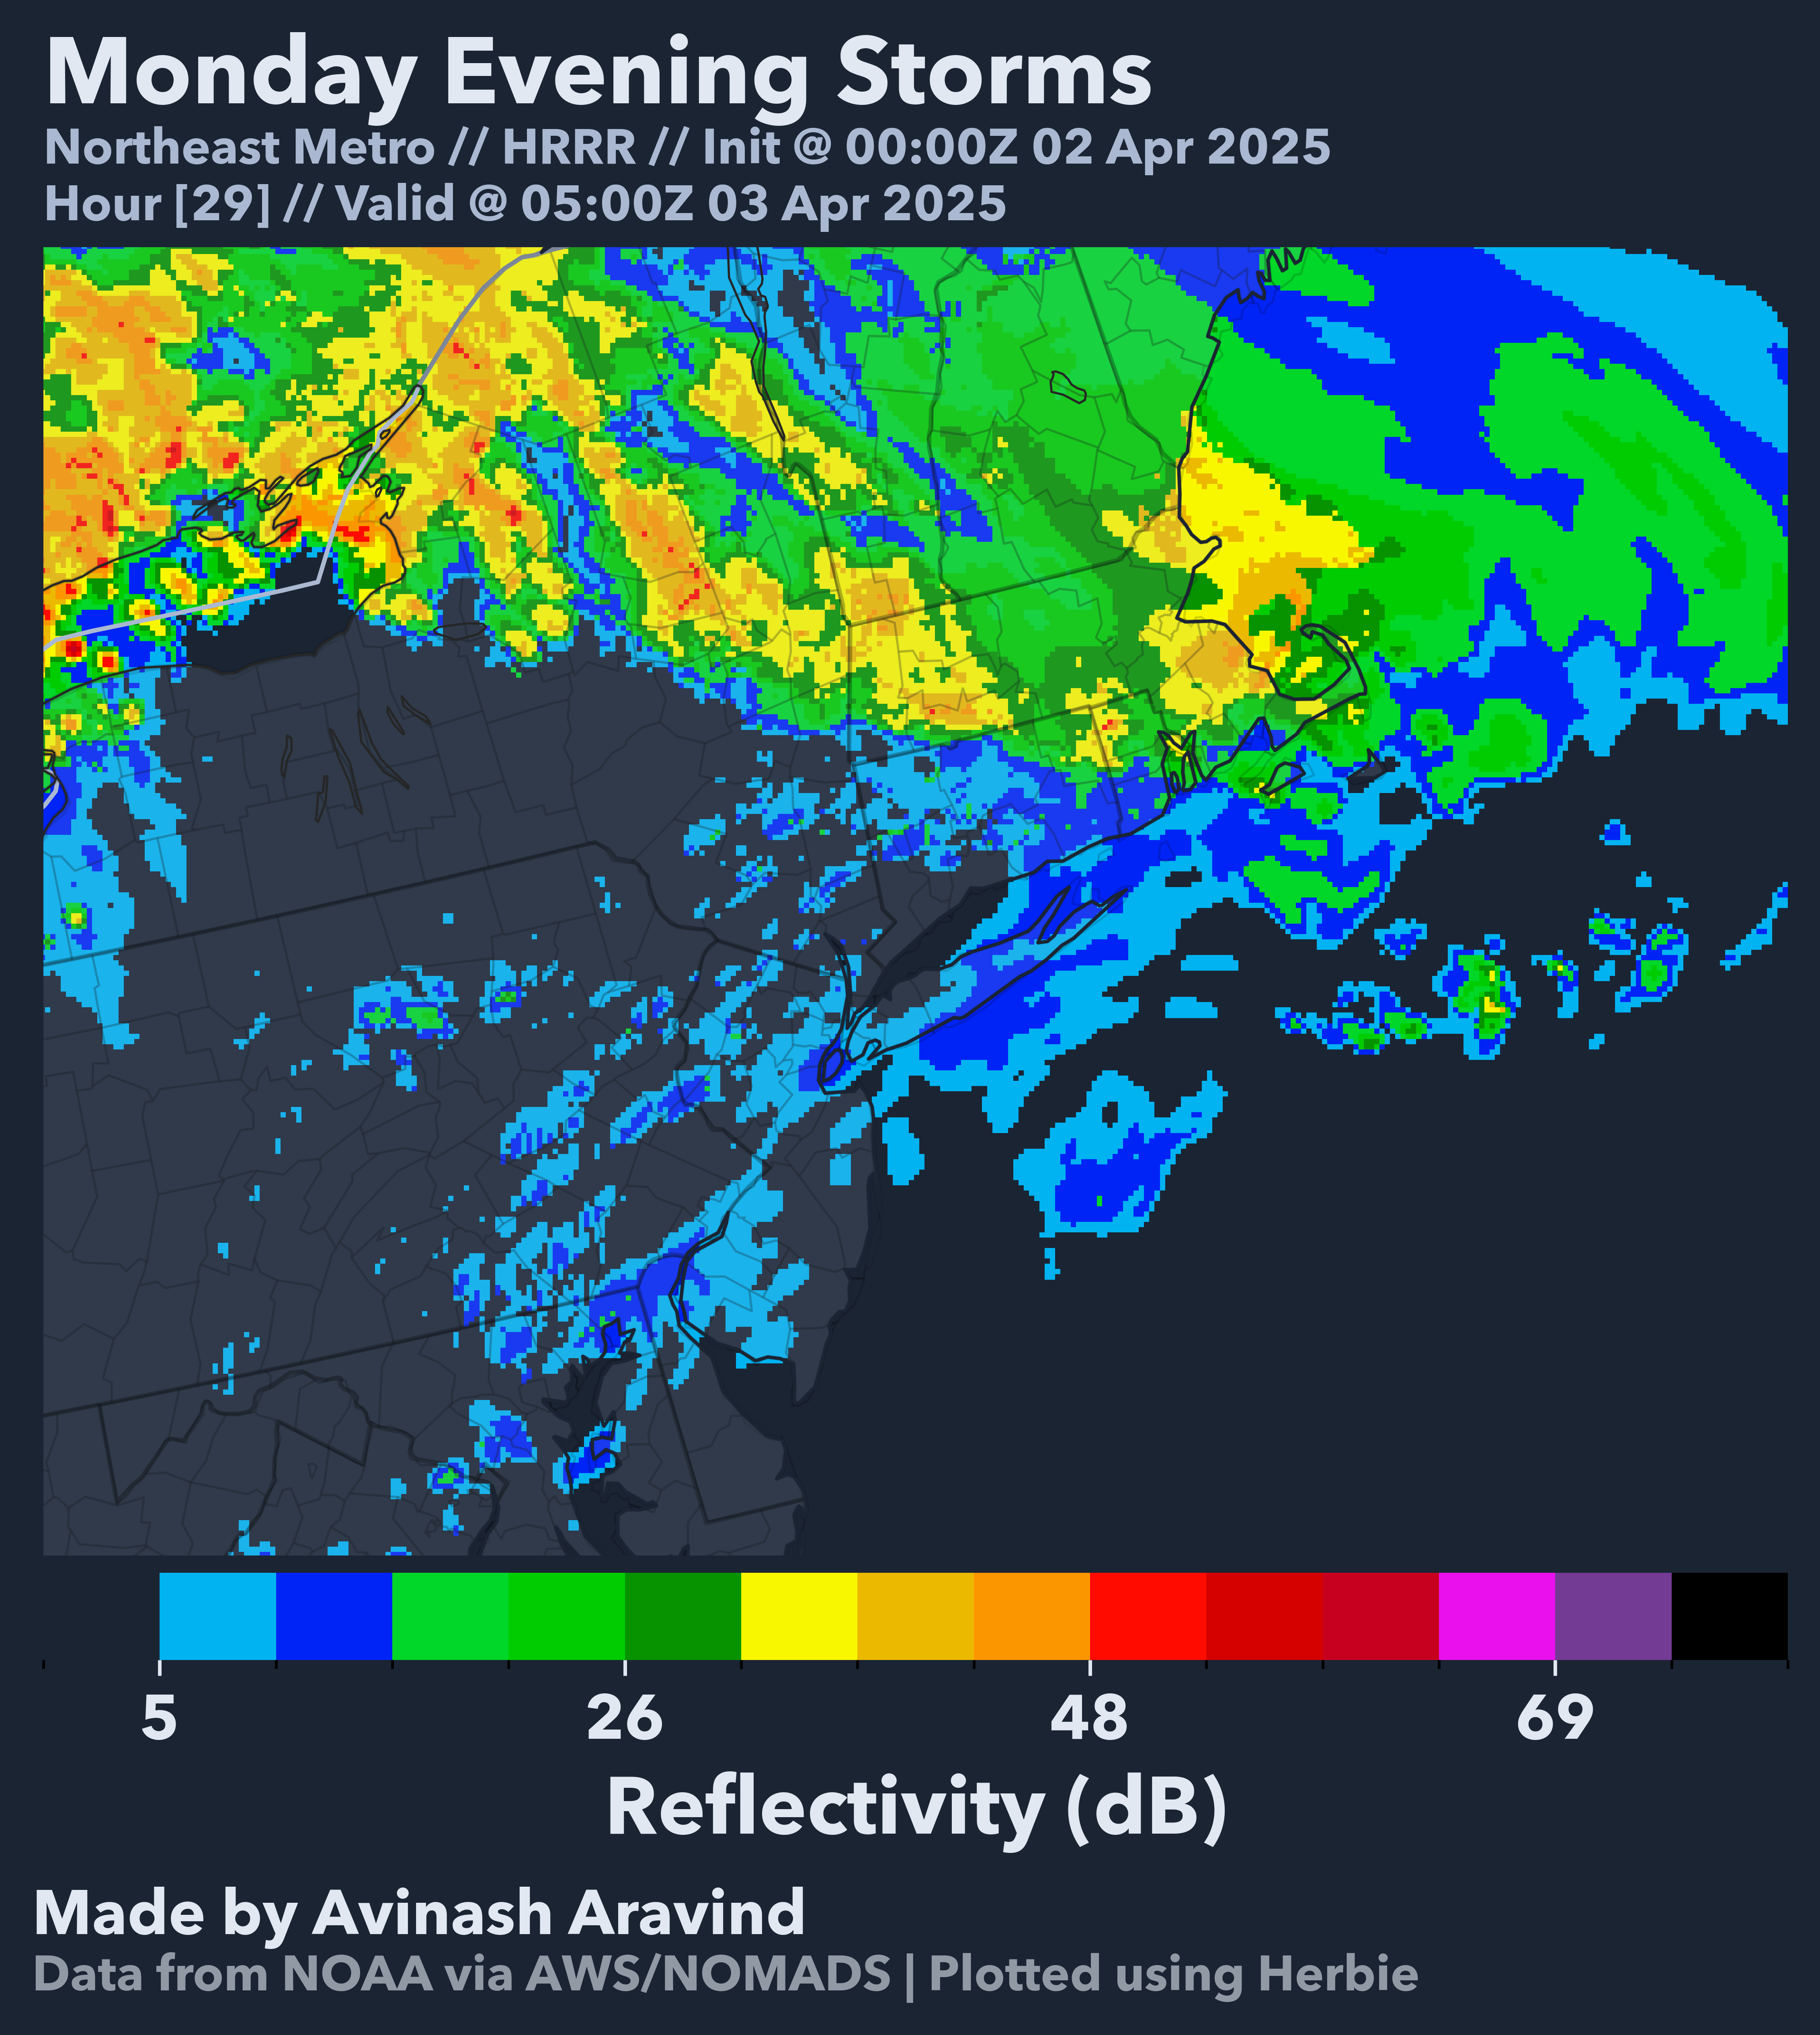

In [4]:
def aniplot(i,d, h=0):
    plt.clf()
    ds, H = get(i,d, h)
    ax, p = plot(ds, H, h)
    cb = plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.01,
    label="2m Temperature (" + r"$\degree$F" + ")",
    spacing="proportional", 
    ticks=(paint.RadarReflectivity.bounds)[1::4],
    )

    cb.ax.tick_params(color="#e1e8f2")
    cb.ax.set_xlabel("Reflectivity (" + r"dB" + ")", color="#e1e8f2", size=18)
    cb.ax.set_xticklabels((paint.RadarReflectivity.bounds)[1::4].astype(int), color="#e1e8f2", size=14)
    cb.outline.set_visible(False)

    name = f"images/frame{h}d{d}"
    plt.savefig(name, dpi=400, bbox_inches="tight", pad_inches=0.3)
    return name

frames = []
for h in range(18,30):
    name = aniplot(0,2,h)
    frames.append(name)

In [5]:
from PIL import Image

def create_gif(image_paths, output_gif_path, duration=500):
    images = [Image.open(f"{image_path}.png") for image_path in image_paths]
    # Save as GIF
    images[0].save(
    output_gif_path,
    save_all=True,
    append_images=images[1:],
    duration=duration,
    loop=0 # 0 means infinite loop
    )

# List of image file paths
# Output GIF path
output_gif_path = "gifs/hrrr_refl.gif"
# Create GIF
create_gif(frames, output_gif_path)

print(f"GIF created and saved at {output_gif_path}")

GIF created and saved at gifs/hrrr_refl.gif


In [6]:
folder_path = "images"

for item in os.scandir(folder_path):
    if item.is_file():
        os.remove(item.path)